# Week 11: Pre-Class Assignment: Dimensionality Reduction

### <p style="text-align: right;"> &#9989; Kyle Taft
 
![pcann](https://www.mdpi.com/materials/materials-14-04445/article_deploy/html/images/materials-14-04445-g003.png)



## Goals for this Pre-Class Assignment

- Understand principal component analysis
- Linear and non linear transformation
  
Total number of points: **37 points**

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-Class Assignments" submission folder on D2L.  Submission instructions can be found at the end of the notebook.


---
# Part 0: Reading (12 points)

&#9989; **Do This:** Read chapter 8 and be sure you can answer the questions 


1. Name four types of PCA. (2 points)
2. How can you determine performance/accuracy of a DR algorithm? (2 points)
3. Look up (using the internet or any other resource you might have) these methods - {Isomap, t-SNE, LDA, MDS} - and describe what they do. Are they built into `sklearn`? Is there any reason you would use these over LLE? (4 points)
5. What is the curse of dimensionality? (2 points)
6. Is dimensionality reduction reversbile? That is, once you have performed dimensionality reduction, can you recover your original data again? (2 points)



1. Randomized PCA (good when d << n), Incemental PCA (batched), Random Projection (good when d >> 0), Kernel PCA
2. Reconstruction error if possible. If not, seeing if the data is still useful for the task at hand.
3. 
   - `Isomap` Makes a graph of nearest neighbors and tries to preserve the geodesic distance between points. There is sklearn.manifold.Isomap. 
   - `t-SNE` tries to keep similar instances together and others apart. There is sklearn.manifold.TSNE. It can be used to visualize high dimensional data.
   - `LDA` is a supervised linear classification algorithm that tries to find the axis that maximizes the separation between multiple classes. There is sklearn.discriminant_analysis.LinearDiscriminantAnalysis. It's good to use before another classification algorithm.
   - `MDS`  tries to preserve the distance between points. There is sklearn.manifold.MDS. It can be good for lower dimensional data.

All of these are possible to use over LLE. It depends on the data and the task at hand.
  
4. The curse of dimensionality is the fact that as the number of dimensions increases we experience both a sparsity of data (high dimensions nothing is close to one another) which can lead to overfitting and an increase in computational complexity.
5. It is not reversibile it is a lossy process. When you reduce the dimensionality of your data you are losing information.

---
# Part 1: Combining dmensionality reduction with ANNs (25 points)

One of the uses of dimensionality reduction (DR) is that you can make ML methods run faster. The idea is that you string together two ML methods sequentially:

1. unsupervised learning is used for DR,
2. supervised learning is used for your task (e.g., classification). 

Let's try this by building an ANN classifier that does DR first. We'll use the standard digits MNIST dataset, but feel free to swap in your own. Look at what the code does in the next cell. Be sure you understand all of it; then, run it. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# This can take a minute or two to download. Depending on your TF version you may get different results. 
from keras.datasets import fashion_mnist, mnist

# digits
(X_train, y_train), (X_test, y_test)  = mnist.load_data()

X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train.reshape(-1, 784 )
X_test = X_test.reshape(-1, 784 )
# confirm we know the size of the data
print(f"MNIST Digits:")
print(f"Size of training set: {X_train.shape}")
print(f"Size of testing set: {X_test.shape}")
print(f"Target labels: {np.unique(y_test)}")


MNIST Digits:
Size of training set: (60000, 784)
Size of testing set: (10000, 784)
Target labels: [0 1 2 3 4 5 6 7 8 9]


Your taks is to take the MNIST data from above and put it in lower dimensionality using [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). With the lower-dimensional data, run that through the neural network. There are the obvious questions:

* does the quality/score degrade, and by how much? 
* how many dimensions can we go down to from 784 and get a given score? 
* how much time does this save? 

You will answer these questions by making one plot with two panels.

&#9989; **Do This: (6 points)** Write code that 

- creates **two** neural network architectures. The only difference between the two architectures should be the number of neurons in the hidden layer. You should choose how to set up the other hyperparameters, _e.g._ the activation function, optimization method, weight initialization, etc. We don't want to change too many hyperparameter, otherwise we would compare apples to oranges. Below there is some helper code to get you started. (2 points)

- measures the time it takes to fit the train dataset for each architecture. (2 points)

- measures the accuracy score on the train and on the test set for each architecture. (2 points)

Some helper code is given below


In [2]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import time
def create_ANN(input_shape = (784,), hidden_layers = (100,) ):
    
    # Define the optimizer
    opt = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    
    # Define the model
    model = Sequential()

    # Add the first hidden layer
    model.add( Dense(hidden_layers[0], input_shape= input_shape, activation="relu", kernel_initializer='glorot_normal') )

    # Loop over the remaining hidden layers
    if len(hidden_layers) > 1:
        for hl in hidden_layers[1:]:
            model.add( Dense(hl, input_shape= input_shape, activation="relu", kernel_initializer='glorot_normal'))
    
    # Add the output layer (10 digits)
    model.add(Dense(10, activation="softmax", kernel_initializer='glorot_normal'))
    
    model.compile(optimizer=opt,
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'] )
    return model

In [3]:
# Define models
nn_100 = create_ANN((784,), (100,) )
nn_500 = create_ANN((784,), (500,) )

# Fit models

start_time = time.time()
history = nn_100.fit(X_train, y_train, verbose = 0, epochs = 5)
end_time = time.time()
nn_100_time = end_time - start_time

nn_100_results = pd.DataFrame(history.history)

start_time = time.time()
history = nn_500.fit(X_train, y_train, verbose = 0, epochs = 5)
end_time = time.time()
nn_500_time = end_time - start_time

nn_500_results = pd.DataFrame(history.history)



MNIST Digits: 100 Neurons
Training Accuracy: 0.9739
Testing Accuracy: 0.9616
Training Time: 30.1535 seconds
MNIST Digits: 500 Neurons
Training Accuracy: 0.9713
Testing Accuracy: 0.9586
Training Time: 51.8838 seconds


<Figure size 576x360 with 0 Axes>

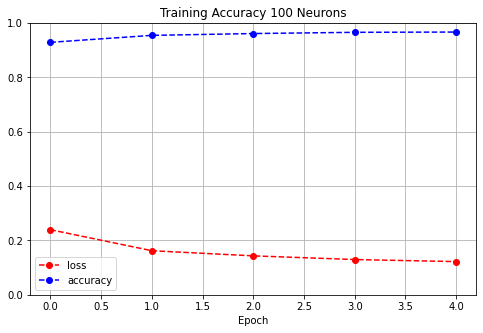

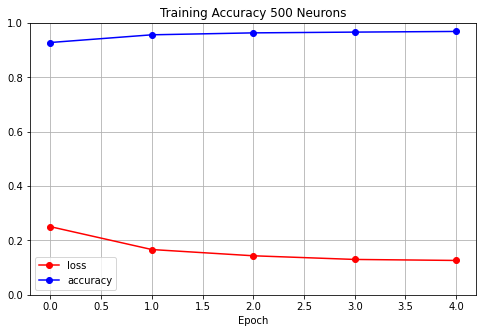

In [4]:
plt.figure(figsize=(8, 5))  
nn_100_results.plot(figsize=(8, 5), ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--o", "b--o", ])
plt.title("Training Accuracy 100 Neurons")
nn_500_results.plot(figsize=(8, 5), ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r-o", "b-o", ])
plt.title("Training Accuracy 500 Neurons")

loss_train, accuracy_train = nn_100.evaluate(X_train, y_train, verbose = False)
loss_test, accuracy_test = nn_100.evaluate(X_test, y_test, verbose = False)
print()
print("MNIST Digits: 100 Neurons")
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Testing Accuracy: {accuracy_test:.4f}")
print(f"Training Time: {nn_100_time:.4f} seconds")

loss_train, accuracy_train = nn_500.evaluate(X_train, y_train, verbose = False)
loss_test, accuracy_test = nn_500.evaluate(X_test, y_test, verbose = False)
print("MNIST Digits: 500 Neurons")
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Testing Accuracy: {accuracy_test:.4f}")
print(f"Training Time: {nn_500_time:.4f} seconds")

&#9989; **Do This: (12 points)** Write a piece of code that, given a number of dimensions, performs PCA on the `X_train` dataset and feeds the transformed dataset to the two NN architectures. Measure the fit time and the accuracy score on the train and test set. Then repeat the same procedure for many PCA dimensions and make a plot with two panels (e.g., using `subplots`) (4 points): 

* _in the left panel:_ plot the training and testing scores versus the number of PCA dimensions for the **two** ANN architectures; there will be four curves in total: two for each architecture.  (2 points)  
* _in the right panel:_ plot the fit time versus PCA dimension for each architecture. There should be two curves in total in this plot for two curves. (2 points)
* Add axis labels and a legend for each line in the plot. (2 points)
* For each panel make sure to change the colors, linestyles, markers and other parameters to make the plot **easy to understand** (2 points)
* Do you think you should make the x scale logarithmic ?
  
In a final markdown cell, discuss your conclusions from looking at these two panels. 

Below there is some helper code to get you started. 

In [7]:
# Calculate the multiple PCA
from sklearn.decomposition import PCA
pca_dimensions = np.array([2, 3, 10, 50, 100, 200, 400, 784])

train_accuracy = []
test_accuracy = []
times = []


for dim in pca_dimensions:
    print(dim)

    # Perform PCA
    pca = PCA(n_components=dim)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Define models
    nn_100 = create_ANN((dim,), (100,) )
    nn_500 = create_ANN((dim,), (500,) )

    # Fit models
    start_time = time.time()
    nn_100.fit(X_train_pca, y_train, verbose = 0, epochs = 5)
    end_time = time.time()
    nn_100_time = end_time - start_time

    start_time = time.time()
    nn_500.fit(X_train_pca, y_train, verbose = 0, epochs = 5)
    end_time = time.time()
    nn_500_time = end_time - start_time


    # Evaluate models
    _, accuracy_train_100 = nn_100.evaluate(X_train_pca, y_train, verbose = False)
    _, accuracy_test_100 = nn_100.evaluate(X_test_pca, y_test, verbose = False)

    _, accuracy_train_500 = nn_500.evaluate(X_train_pca, y_train, verbose = False)
    _, accuracy_test_500 = nn_500.evaluate(X_test_pca, y_test, verbose = False)

    # Store results
    train_accuracy.append([accuracy_train_100, accuracy_train_500])
    test_accuracy.append([accuracy_test_100, accuracy_test_500])
    times.append([nn_100_time, nn_500_time])
            
    



2
3
10
50
100
200
400
784


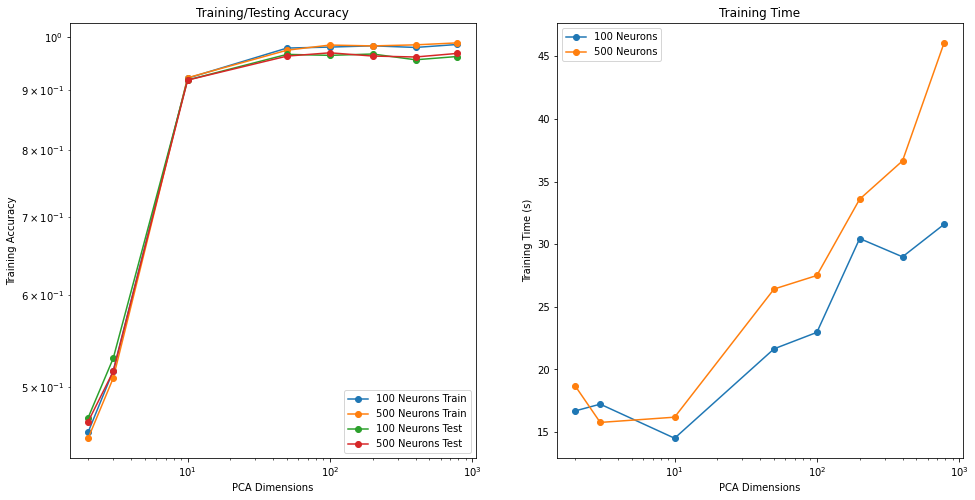

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (16,8))
ax[0].plot(pca_dimensions, train_accuracy, 'o-')
ax[0].plot(pca_dimensions, test_accuracy, 'o-')
ax[0].set_xlabel('PCA Dimensions')
ax[0].set_ylabel('Training Accuracy')
ax[0].legend(['100 Neurons Train', '500 Neurons Train', '100 Neurons Test', '500 Neurons Test'])
ax[0].set_title('Training/Testing Accuracy')
ax[0].set_xscale('log') # Yes, the x-scale should be logaritmic from the spacing of the PCA dimensions
ax[0].set_yscale('log')

ax[1].plot(pca_dimensions, times, 'o-')
ax[1].set_xlabel('PCA Dimensions')
ax[1].set_ylabel('Training Time (s)')
ax[1].legend(['100 Neurons', '500 Neurons'])
ax[1].set_title('Training Time')
ax[1].set_xscale('log')



&#9989; **Question: (3 points)** Looking at your plot above what PCA dimension gives a good trade-off between accuracy and speed?  Explain your answer

It looks like that at around 50-100 dimensions we hit that elbow in the accuracy vs dimension plot. We can see a big reduction in time compared to the full set here.

&#9989; **Question: (4 points)** In Week 09 we did something similar but using autoencoders. Go check the lecture code in D2L. How does PCA differ from what we did with autoencoders? Make sure to check the hyperparameters of the autoencoder.

For PCA we specify the amount of dimension we want to reduce to and perform linear algebra to calculate. For autoencoders we specify the number of neurons in the hidden layer and train as we would a NN with things like backpropagation.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**


In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/QyrbnptkyA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

&#169; Copyright 2023, Department of Computational Mathematics, Science and Engineering at Michigan State University.